
Planetary positions for Delhi, India  (1995-01-30 21:14:00 local)

Sun       Aquarius    10°17′
Moon      Aquarius    06°23′
Mars      Leo         27°39′
Mercury   Aquarius    19°17′
Jupiter   Sagittarius 10°07′
Venus     Sagittarius 24°14′
Saturn    Pisces      10°55′
Rahu      Scorpio     10°12′
Ketu      Taurus      10°12′

--- TinyLlama Predictions & Remedies ---

Monthly Prediction:
1) Career: The next 12 months will bring opportunities for new job opportunities and promotions. However, it is advisable to be careful about taking on high-profile roles or risky assignments that may not align with one's values.
2) Finance: Investment opportunities in the stock market are expected to increase over the next 12 months, as well as for property and business ventures. However, it is crucial to stay cautious of financial investments and ensure they align with one's personal goals and values.
3) Relationships: There will be occasional ups and downs in relationships, but overall, the next 12

/var/folders/1h/jzkc4s554818r0wfvp5d90zw0000gn/T/ipykernel_42903/591333016.py:170: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10')
/var/folders/1h/jzkc4s554818r0wfvp5d90zw0000gn/T/ipykernel_42903/591333016.py:177: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.3, 1.02))


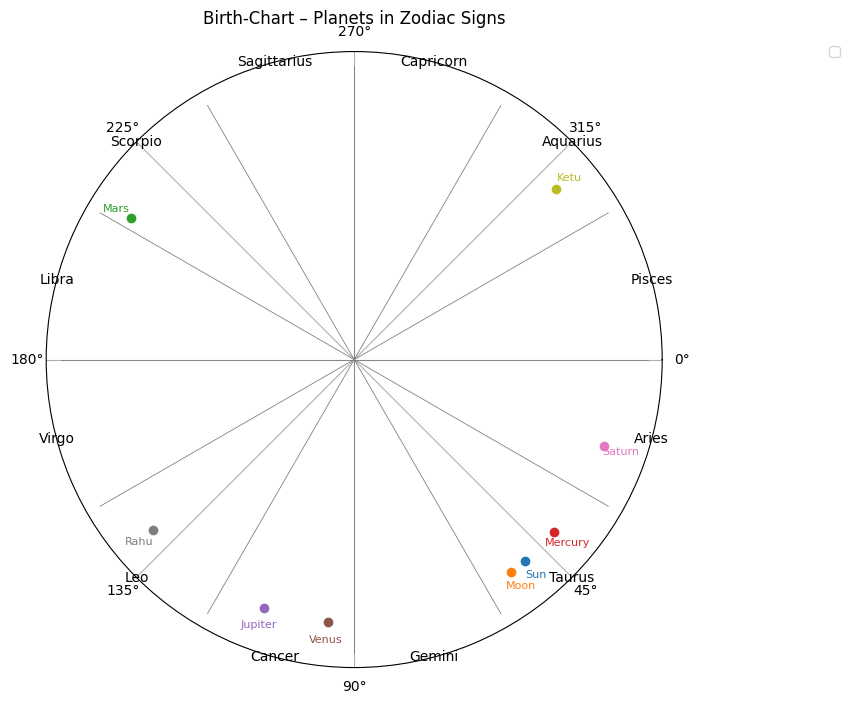

In [14]:
#!/usr/bin/env python3
# ---------------------------------------------------------------------------
# Birth‐chart → interpret_chart → TinyLlama predictions (console only)
# ---------------------------------------------------------------------------
import swisseph as swe
import pytz
from datetime import datetime
from geopy.geocoders import Nominatim
from ollama import chat, ChatResponse
import matplotlib.pyplot as plt
import numpy as np

# 1. Swiss Ephemeris data directory
swe.set_ephe_path("/path/to/ephemeris")   # ◀️ update this

SIGNS = [
    "Aries","Taurus","Gemini","Cancer","Leo","Virgo",
    "Libra","Scorpio","Sagittarius","Capricorn","Aquarius","Pisces"
]

# 2. Core helpers -----------------------------------------------------------
def geocode_place(place):
    loc = Nominatim(user_agent="vedic_astrology_app").geocode(place)
    if not loc:
        raise ValueError(f"Place not found ➜ {place}")
    return loc.latitude, loc.longitude, loc.address

def local_to_utc(dt_local, tz_str):
    return pytz.timezone(tz_str).localize(dt_local).astimezone(pytz.utc)

def julian_day(dt_utc):
    return swe.julday(
        dt_utc.year, dt_utc.month, dt_utc.day,
        dt_utc.hour + dt_utc.minute/60 + dt_utc.second/3600
    )

def planetary_longitudes(jd):
    codes = {
        'Sun': swe.SUN, 'Moon': swe.MOON, 'Mars': swe.MARS,
        'Mercury': swe.MERCURY, 'Jupiter': swe.JUPITER,
        'Venus': swe.VENUS, 'Saturn': swe.SATURN
    }
    pl = {name: swe.calc_ut(jd, code)[0][0] % 360 for name, code in codes.items()}
    node = swe.calc_ut(jd, swe.MEAN_NODE)[0][0] % 360
    pl['Rahu'], pl['Ketu'] = node, (node + 180) % 360
    return pl

def compute_ascendant(jd, lat, lon):
    houses, ascmc = swe.houses(jd, lat, lon)
    return ascmc[0], houses

def format_sign_degree(lon):
    """
    0–360° → (sign_name, deg 0–29, min 0–59)
    """
    idx = int(lon // 30)
    sign = SIGNS[idx]
    deg_in_sign = lon % 30
    d = int(deg_in_sign)
    m = int(round((deg_in_sign - d) * 60))
    if m == 60:
        d += 1
        m = 0
    return sign, d, m

# 3. Your interpret_chart() function ---------------------------------------
def interpret_chart(planets, ascendant, houses):
    interpretations = {}
    # Jupiter
    j = planets["Jupiter"] % 30
    if j < 5:
        interpretations["Jupiter"] = "Jupiter is in an extremely favorable position, indicating strong potential for wealth, abundance, and wisdom."
    elif j < 10:
        interpretations["Jupiter"] = "Jupiter is well placed, supporting financial growth and academic success, but disciplined management is advised."
    elif j < 20:
        interpretations["Jupiter"] = "Jupiter's influence is moderate; opportunities exist but require careful planning to fully realize benefits."
    else:
        interpretations["Jupiter"] = "Jupiter is in a less favorable position, suggesting challenges in accumulating wealth. Remedial measures are recommended."
    # Sun
    s = planets["Sun"] % 30
    if s < 5:
        interpretations["Sun"] = "The Sun's exalted placement promises vitality, leadership, and success in career."
    elif s < 10:
        interpretations["Sun"] = "The Sun is positively placed, offering balanced energy and steady progress, though minor issues with self-assertion can arise."
    elif s < 20:
        interpretations["Sun"] = "The Sun shows moderate challenges, with potential delays in recognition. Efforts to boost self-confidence may be needed."
    else:
        interpretations["Sun"] = "The Sun is in a debilitated position, potentially reducing vitality and leadership. Corrective measures are advised."
    # Mars
    m = planets["Mars"] % 30
    if m < 5:
        interpretations["Mars"] = "Mars is strongly positioned, indicating high energy and assertiveness; however, be cautious of excessive aggression."
    elif m < 10:
        interpretations["Mars"] = "Mars has a balanced influence, providing drive and ambition with controlled assertiveness."
    elif m < 20:
        interpretations["Mars"] = "Mars's moderate influence may occasionally lead to impulsiveness or conflict; a steady approach is recommended."
    else:
        interpretations["Mars"] = "Mars is in a challenging position, suggesting a risk of undue aggression or lack of focus. Energy management is essential."
    # Mercury
    me = planets["Mercury"] % 30
    if me < 5:
        interpretations["Mercury"] = "Mercury is excellently placed, indicating sharp intellect and clear communication."
    elif me < 10:
        interpretations["Mercury"] = "Mercury is well placed, fostering effective communication, though minor misunderstandings may occur."
    elif me < 20:
        interpretations["Mercury"] = "Mercury's moderate influence could lead to occasional lapses in clarity. Maintaining focus on communication is advisable."
    else:
        interpretations["Mercury"] = "Mercury is in a less favorable position, suggesting communication challenges. Remedial measures are recommended."
    # Moon
    mo = planets["Moon"] % 30
    if mo < 5:
        interpretations["Moon"] = "The Moon is excellently placed, indicating strong emotional stability and intuition."
    elif mo < 10:
        interpretations["Moon"] = "The Moon is well placed, supporting nurturing qualities and a caring nature, with only slight mood variations."
    elif mo < 20:
        interpretations["Moon"] = "Moon's moderate influence may result in occasional emotional fluctuations. Calming practices are beneficial."
    else:
        interpretations["Moon"] = "The Moon is in a challenging position, possibly leading to emotional instability. Mindfulness or meditation is advised."
    # Venus
    v = planets["Venus"] % 30
    if v < 5:
        interpretations["Venus"] = "Venus is excellently placed, symbolizing harmonious relationships, artistic talent, and favorable finances."
    elif v < 10:
        interpretations["Venus"] = "Venus is favorably placed, encouraging balanced relationships and creativity, though minor financial caution is advised."
    elif v < 20:
        interpretations["Venus"] = "Venus's moderate influence suggests fluctuations in personal relationships or creative expression. Some remedial measures could help."
    else:
        interpretations["Venus"] = "Venus is in a less favorable position, indicating potential challenges in relationships and finances. Remedial measures are advisable."
    # Saturn
    sat = planets["Saturn"] % 30
    if sat < 5:
        interpretations["Saturn"] = "Saturn is optimally placed, providing discipline, endurance, and the ability to overcome obstacles."
    elif sat < 10:
        interpretations["Saturn"] = "Saturn is moderately placed, suggesting that delays and restrictions can be managed with consistent effort."
    elif sat < 20:
        interpretations["Saturn"] = "Saturn's influence is challenging, leading to potential delays, restrictions, or obstacles. Focused effort and remedial measures are recommended."
    else:
        interpretations["Saturn"] = "Saturn is in a highly challenging position, which may result in significant obstacles and delays. Strong corrective measures are advised."
    # Rahu
    rah = planets["Rahu"] % 30
    if rah < 5:
        interpretations["Rahu"] = "Rahu is in an advantageous position, indicating innovative drive and unconventional success, though caution against overambition is warranted."
    elif rah < 10:
        interpretations["Rahu"] = "Rahu is moderately placed, bringing opportunities for unusual achievements; however, there's a risk of misdirection if not managed carefully."
    elif rah < 20:
        interpretations["Rahu"] = "Rahu's influence is troubling, suggesting confusion, unexpected challenges, or illusions. Careful planning is needed."
    else:
        interpretations["Rahu"] = "Rahu is in a difficult position, which may lead to significant disruptions and potential deceptions. Remedial measures are strongly recommended."
    # Ketu
    ket = planets["Ketu"] % 30
    if ket < 5:
        interpretations["Ketu"] = "Ketu is excellently placed, indicating strong spiritual insight and detachment from material concerns."
    elif ket < 10:
        interpretations["Ketu"] = "Ketu is well placed, fostering intuitive strength and a balanced approach to spiritual matters."
    elif ket < 20:
        interpretations["Ketu"] = "Ketu's moderate influence suggests occasional challenges in balancing material pursuits with spiritual growth."
    else:
        interpretations["Ketu"] = "Ketu is in a challenging position, which may lead to confusion in material goals. A greater focus on spiritual practices is recommended."
    return interpretations

# 4. Polar plot (optional) -------------------------------------------------
def plot_chart(planets):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
    ax.set_theta_zero_location('E')
    ax.set_theta_direction(-1)
    for i in range(12):
        th = np.radians(i * 30)
        ax.plot([th, th], [0, 1], color='gray', lw=0.6)
        ax.text(th + np.radians(15), 1.05, SIGNS[i], ha='center', va='center')
    cmap = plt.cm.get_cmap('tab10')
    for idx, (pl, lon) in enumerate(planets.items()):
        th = np.radians(360 - lon)
        ax.plot(th, 0.9, 'o', color=cmap(idx))
        ax.text(th, 0.96, pl, ha='center', va='center', fontsize=8, color=cmap(idx))
    ax.set_rticks([])
    ax.set_title("Birth-Chart – Planets in Zodiac Signs", pad=20)
    ax.legend(bbox_to_anchor=(1.3, 1.02))
    plt.show()

# 5. Main -------------------------------------------------------------------
def main():
    dob   = input("Enter date of birth (YYYY-MM-DD): ").strip()
    tob   = input("Enter exact birth time (HH:MM:SS, 24-h): ").strip()
    place = input("Enter birthplace (city, country): ").strip()
    name  = input("Enter name for report header: ").strip() or "Native"

    dt_local = datetime.strptime(f"{dob} {tob}", "%Y-%m-%d %H:%M:%S")
    lat, lon, full_place = geocode_place(place)
    dt_utc  = local_to_utc(dt_local, "Asia/Kolkata")  # change tz if needed
    jd      = julian_day(dt_utc)

    planets = planetary_longitudes(jd)
    asc, houses = compute_ascendant(jd, lat, lon)

    # — Print Sign+°′ table —
    print(f"\nPlanetary positions for {full_place}  ({dob} {tob} local)\n")
    for pl, lon in planets.items():
        sign, d, m = format_sign_degree(lon)
        print(f"{pl:<9} {sign:<11} {d:02d}°{m:02d}′")

    # — Interpret chart locally —
    interp = interpret_chart(planets, asc, houses)

    # — Build summary text —
    pos_lines = [
        f"{pl:<9} {format_sign_degree(lon)[0]:<11} "
        f"{format_sign_degree(lon)[1]:02d}°{format_sign_degree(lon)[2]:02d}′"
        for pl, lon in planets.items()
    ]
    positions_str = "\n".join(pos_lines)

    summary = (
        f"Kundali Summary for {name}\n"
        f"Ascendant: {asc:.2f}°\n\n"
        "Planetary Positions:\n"
        f"{positions_str}\n\n"
        "Interpretations:\n" +
        "\n".join(f"{k}: {v}" for k, v in interp.items())
    )

    # — TinyLlama predictions & remedies —
    prompt = f"""You are an expert Vedic astrologer.
Using the Kundali summary below, provide:
A) Monthly Predictions (career, finance, relationships, health) for the next 12 months.
B) Recommended Remedies (specific upaay).

--- Kundali Summary ---
{summary}
"""
    try:
        resp: ChatResponse = chat(
            model="tinyllama",
            messages=[{"role":"user","content":prompt}]
        )
        print("\n--- TinyLlama Predictions & Remedies ---\n")
        print(resp.message.content)
    except Exception as e:
        print(f"[TinyLlama error] {e}")

    # — Optional: Show the wheel —
    plot_chart(planets)

if __name__ == "__main__":
    main()